Approximate cost: 2083.2260085023677
TSP tour: [(681, -139), (654, -144), (677, -87), (611, -106), (577, -75), (537, -108), (588, -211), (489, -198), (385, -169), (316, -123), (97, -99), (394, 46), (589, 53), (746, 96), (841, -66), (805, -120), (838, -203), (705, -159), (681, -139)]


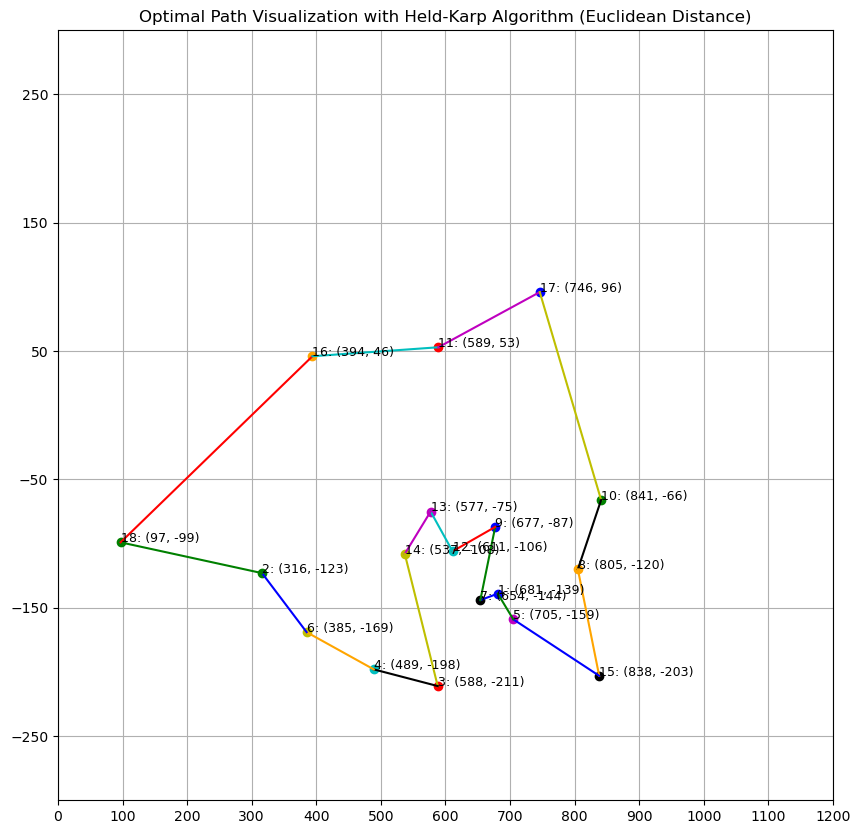

In [10]:
import matplotlib.pyplot as plt
from itertools import combinations
import math
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\Gusul\Desktop\keypoints.xlsx'
data = pd.read_excel(file_path, usecols=[0, 3])  # Only load the first and fourth columns

# Create keypoint coordinates as tuples (column 1, column 4)
marked_points = list(zip(data.iloc[:, 0], data.iloc[:, 1]))

# Euclidean distance calculation function
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Construct the distance matrix
n = len(marked_points)
distance_matrix = [[euclidean_distance(marked_points[i], marked_points[j]) for j in range(n)] for i in range(n)]

# Held-Karp algorithm for solving the TSP problem
def held_karp_corrected(distance_matrix):
    n = len(distance_matrix)
    dp = {}
    for i in range(1, n):
        dp[(1 << i, i)] = (distance_matrix[0][i], 0)
    for subset_size in range(2, n):
        for subset in combinations(range(1, n), subset_size):
            bits = sum(1 << bit for bit in subset)
            for k in subset:
                prev = bits & ~(1 << k)
                dp[(bits, k)] = min(((dp[(prev, m)][0] + distance_matrix[m][k], m) for m in subset if m != k), key=lambda x: x[0])
    all_bits = (1 << n) - 2
    opt, parent = min(((dp[(all_bits, k)][0] + distance_matrix[k][0], k) for k in range(1, n)), key=lambda x: x[0])
    path = [0]
    for _ in range(n - 2):
        path.append(parent)
        new_bits = all_bits & ~(1 << parent)
        _, parent = dp[(all_bits, parent)]
        all_bits = new_bits
    path.append(parent)
    path.append(0)
    return opt, list(reversed(path))

# Calculate the optimal distance and path
opt_distance, path = held_karp_corrected(distance_matrix)
opt_path = [marked_points[p] for p in path]

print(f"Approximate cost: {opt_distance}")
print(f"TSP tour: {opt_path}")

# Visualization
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Set x-axis and y-axis limits
plt.xlim(0, 900)  # x-axis from 0 to 900
plt.ylim(-300, 300)  # y-axis from -300 to 300

# Define custom ticks for the grid lines
plt.xticks(range(0, 1201, 100))  # x-axis grid lines every 100 units
plt.yticks(range(-250, 251, 100))  # y-axis grid lines every 100 units

plt.grid(True)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# Plot the marked points with labels
for i, point in enumerate(marked_points):
    plt.plot(point[0], point[1], 'o', color=colors[i % len(colors)])
    plt.text(point[0] + 0.1, point[1] + 0.1, f'{i+1}: ({point[0]}, {point[1]})', fontsize=9)

# Plot the optimal path
for i in range(len(opt_path) - 1):
    plt.plot([opt_path[i][0], opt_path[i+1][0]], [opt_path[i][1], opt_path[i+1][1]], '-', color=colors[i % len(colors)])

plt.title('Optimal Path Visualization with Held-Karp Algorithm (Euclidean Distance)')
plt.show()


Approximate cost: 2595.2979607118928
TSP tour: [(682, -108), (665, -70), (675, -29), (833, -71), (897, -59), (966, -111), (990, -146), (1142, 12), (744, 21), (716, 94), (174, 91), (80, -109), (233, -88), (269, -21), (549, -79), (580, -130), (600, -111), (649, -89), (682, -108)]


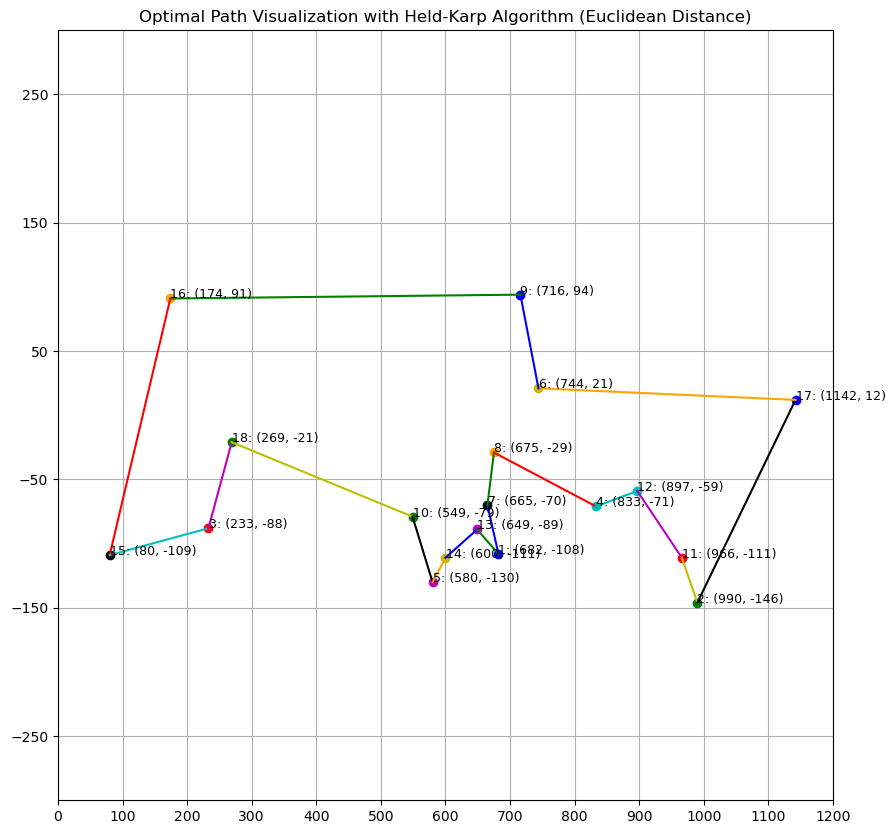

In [11]:
import matplotlib.pyplot as plt
from itertools import combinations
import math
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\Gusul\Desktop\keypoints_2.xlsx'
data = pd.read_excel(file_path, usecols=[0, 3])  # Only load the first and fourth columns

# Create keypoint coordinates as tuples (column 1, column 4)
marked_points = list(zip(data.iloc[:, 0], data.iloc[:, 1]))

# Euclidean distance calculation function
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Construct the distance matrix
n = len(marked_points)
distance_matrix = [[euclidean_distance(marked_points[i], marked_points[j]) for j in range(n)] for i in range(n)]

# Held-Karp algorithm for solving the TSP problem
def held_karp_corrected(distance_matrix):
    n = len(distance_matrix)
    dp = {}
    for i in range(1, n):
        dp[(1 << i, i)] = (distance_matrix[0][i], 0)
    for subset_size in range(2, n):
        for subset in combinations(range(1, n), subset_size):
            bits = sum(1 << bit for bit in subset)
            for k in subset:
                prev = bits & ~(1 << k)
                dp[(bits, k)] = min(((dp[(prev, m)][0] + distance_matrix[m][k], m) for m in subset if m != k), key=lambda x: x[0])
    all_bits = (1 << n) - 2
    opt, parent = min(((dp[(all_bits, k)][0] + distance_matrix[k][0], k) for k in range(1, n)), key=lambda x: x[0])
    path = [0]
    for _ in range(n - 2):
        path.append(parent)
        new_bits = all_bits & ~(1 << parent)
        _, parent = dp[(all_bits, parent)]
        all_bits = new_bits
    path.append(parent)
    path.append(0)
    return opt, list(reversed(path))

# Calculate the optimal distance and path
opt_distance, path = held_karp_corrected(distance_matrix)
opt_path = [marked_points[p] for p in path]

print(f"Approximate cost: {opt_distance}")
print(f"TSP tour: {opt_path}")

# Visualization
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Set x-axis and y-axis limits
plt.xlim(0, 900)  # x-axis from 0 to 900
plt.ylim(-300, 300)  # y-axis from -300 to 300

# Define custom ticks for the grid lines
plt.xticks(range(0, 1201, 100))  # x-axis grid lines every 100 units
plt.yticks(range(-250, 251, 100))  # y-axis grid lines every 100 units

plt.grid(True)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# Plot the marked points with labels
for i, point in enumerate(marked_points):
    plt.plot(point[0], point[1], 'o', color=colors[i % len(colors)])
    plt.text(point[0] + 0.1, point[1] + 0.1, f'{i+1}: ({point[0]}, {point[1]})', fontsize=9)

# Plot the optimal path
for i in range(len(opt_path) - 1):
    plt.plot([opt_path[i][0], opt_path[i+1][0]], [opt_path[i][1], opt_path[i+1][1]], '-', color=colors[i % len(colors)])

plt.title('Optimal Path Visualization with Held-Karp Algorithm (Euclidean Distance)')
plt.show()


Approximate cost: 2015.5037022029924
TSP tour: [(723, -33), (727, -25), (694, -19), (657, -53), (675, -78), (407, -217), (399, -124), (280, -102), (213, -60), (307, -72), (458, -43), (513, -67), (682, 71), (955, 86), (846, -43), (906, -97), (819, -141), (804, -98), (723, -33)]


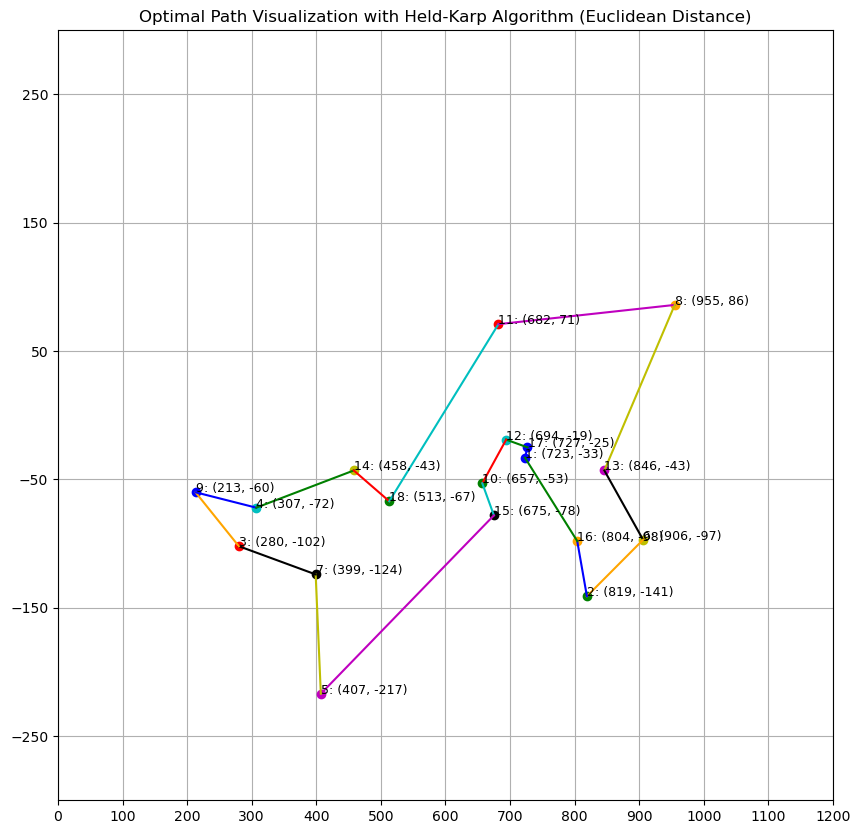

In [12]:
import matplotlib.pyplot as plt
from itertools import combinations
import math
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\Gusul\Desktop\keypoints_3.xlsx'
data = pd.read_excel(file_path, usecols=[0, 3])  # Only load the first and fourth columns

# Create keypoint coordinates as tuples (column 1, column 4)
marked_points = list(zip(data.iloc[:, 0], data.iloc[:, 1]))

# Euclidean distance calculation function
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Construct the distance matrix
n = len(marked_points)
distance_matrix = [[euclidean_distance(marked_points[i], marked_points[j]) for j in range(n)] for i in range(n)]

# Held-Karp algorithm for solving the TSP problem
def held_karp_corrected(distance_matrix):
    n = len(distance_matrix)
    dp = {}
    for i in range(1, n):
        dp[(1 << i, i)] = (distance_matrix[0][i], 0)
    for subset_size in range(2, n):
        for subset in combinations(range(1, n), subset_size):
            bits = sum(1 << bit for bit in subset)
            for k in subset:
                prev = bits & ~(1 << k)
                dp[(bits, k)] = min(((dp[(prev, m)][0] + distance_matrix[m][k], m) for m in subset if m != k), key=lambda x: x[0])
    all_bits = (1 << n) - 2
    opt, parent = min(((dp[(all_bits, k)][0] + distance_matrix[k][0], k) for k in range(1, n)), key=lambda x: x[0])
    path = [0]
    for _ in range(n - 2):
        path.append(parent)
        new_bits = all_bits & ~(1 << parent)
        _, parent = dp[(all_bits, parent)]
        all_bits = new_bits
    path.append(parent)
    path.append(0)
    return opt, list(reversed(path))

# Calculate the optimal distance and path
opt_distance, path = held_karp_corrected(distance_matrix)
opt_path = [marked_points[p] for p in path]

print(f"Approximate cost: {opt_distance}")
print(f"TSP tour: {opt_path}")

# Visualization
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Set x-axis and y-axis limits
plt.xlim(0, 900)  # x-axis from 0 to 900
plt.ylim(-300, 300)  # y-axis from -300 to 300

# Define custom ticks for the grid lines
plt.xticks(range(0, 1201, 100))  # x-axis grid lines every 100 units
plt.yticks(range(-250, 251, 100))  # y-axis grid lines every 100 units

plt.grid(True)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# Plot the marked points with labels
for i, point in enumerate(marked_points):
    plt.plot(point[0], point[1], 'o', color=colors[i % len(colors)])
    plt.text(point[0] + 0.1, point[1] + 0.1, f'{i+1}: ({point[0]}, {point[1]})', fontsize=9)

# Plot the optimal path
for i in range(len(opt_path) - 1):
    plt.plot([opt_path[i][0], opt_path[i+1][0]], [opt_path[i][1], opt_path[i+1][1]], '-', color=colors[i % len(colors)])

plt.title('Optimal Path Visualization with Held-Karp Algorithm (Euclidean Distance)')
plt.show()
